In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("top_hits_2007-2020.csv")
# Drop the null columns where all values are null
# df = df.dropna(axis='columns', how='all')
# Drop the null rows
data=df.drop(columns=["Artist and Title", ""'(x?)'"",'Track','track_id', "Pos", "Wks","T10","Pk","PkStreams"])

audio_only = data.fillna(0)
audio_only

,Total,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,636825483,0.585,0.520,5,-6.136,0,0.0712,0.12400,0.000070,0.1310,0.129,159.801,218147,4
1,585052066,0.732,0.750,11,-6.366,0,0.2310,0.00264,0.000000,0.1090,0.401,155.096,182707,4
2,179292836,0.732,0.750,11,-6.366,0,0.2310,0.00264,0.000000,0.1090,0.401,155.096,182707,4
3,47632753,0.732,0.750,11,-6.366,0,0.2310,0.00264,0.000000,0.1090,0.401,155.096,182707,4
4,41594283,0.732,0.750,11,-6.366,0,0.2310,0.00264,0.000000,0.1090,0.401,155.096,182707,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4774,72612,0.480,0.506,11,-5.554,1,0.3810,0.54900,0.000000,0.0916,0.708,177.440,224267,4
4775,72256,0.594,0.630,6,-7.323,0,0.0268,0.04310,0.000003,0.0974,0.365,117.010,258227,4
4776,70155,0.690,0.805,7,-5.979,0,0.0329,0.01960,0.002820,0.2810,0.738,123.871,269373,4
4777,70035,0.646,0.657,0,-5.300,1,0.0628,0.14500,0.000057,0.4590,0.413,139.990,173214,4


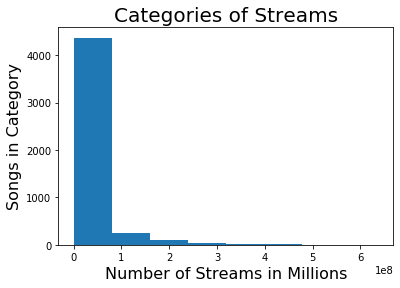

In [5]:
plt.hist(audio_only.iloc[:,0], bins=8)
plt.ylabel("Songs in Category", fontsize=16)
plt.xlabel("Number of Streams in Millions", fontsize=16)
plt.title("Categories of Streams", fontsize=20)
plt.show()

In [6]:
def f(row):
    if row["Total"] < 999999:
        val = 1
    elif row["Total"] > 1000000 and row["Total"] < 39999999:
        val = 2
    elif row["Total"] > 40000000 and row["Total"] < 79999999:
        val = 3
    elif row["Total"] >  80000000 and row["Total"] < 119999999:
        val = 4
    elif row["Total"] > 120000000 and row["Total"] < 159999999:
        val = 5
    elif row["Total"] > 160000000 and row["Total"] < 199999999:
        val = 6
    else:
        val = 7
    return val

In [7]:
audio_only['Stream Category'] = audio_only.apply(f, axis=1)
audio_only.head()

,Total,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Stream Category
0,636825483,0.585,0.52,5,-6.136,0,0.0712,0.12400,0.00007,0.131,0.129,159.801,218147,4,7
1,585052066,0.732,0.75,11,-6.366,0,0.2310,0.00264,0.00000,0.109,0.401,155.096,182707,4,7
2,179292836,0.732,0.75,11,-6.366,0,0.2310,0.00264,0.00000,0.109,0.401,155.096,182707,4,6
3,47632753,0.732,0.75,11,-6.366,0,0.2310,0.00264,0.00000,0.109,0.401,155.096,182707,4,3
4,41594283,0.732,0.75,11,-6.366,0,0.2310,0.00264,0.00000,0.109,0.401,155.096,182707,4,3


In [8]:
vc = audio_only["Stream Category"].value_counts()
vc

2    3462
1     505
3     400
4     163
7     112
5      75
6      62
Name: Stream Category, dtype: int64

In [26]:
processed=audio_only.drop(columns=["Total"])


In [10]:
X = processed.drop("Stream Category", axis = 1)
y = processed["Stream Category"]

###use this for _featureimportances function with Random Forest
feature_names = audio_only.columns

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300)
rf = rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))
print(rf.score(X_train, y_train))

0.694560669456067
0.9545200892857143


In [13]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.10052243853170932, 'mode'),
 (0.0996518094123993, 'Total'),
 (0.09777326365008202, 'tempo'),
 (0.09715661634524578, 'liveness'),
 (0.0965620051410832, 'valence'),
 (0.09568874645507948, 'key'),
 (0.09400247251579195, 'instrumentalness'),
 (0.09211095331821997, 'speechiness'),
 (0.09190101418980906, 'danceability'),
 (0.056535878403054095, 'energy'),
 (0.05235125243518802, 'acousticness'),
 (0.01645565164236285, 'loudness'),
 (0.009287897959974938, 'duration_ms')]